In [83]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/HU2.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


In [96]:
df['q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [61]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,0,"Colab Notebooks,"
1,1,"Kaggle Notebooks,Colab Notebooks,"
2,2,"Kaggle Notebooks,"
3,3,"Colab Notebooks,"
4,4,"Google Cloud Datalab,"
...,...,...
25968,25968,"Colab Notebooks, Amazon Sagemaker Studio Noteb..."
25969,25969,"None,"
25970,25970,NaN
25971,25971,"None,"


In [62]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [63]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [68]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [69]:
df_10_explode

,index,q10
0,0,Colab Notebooks
1,0,
2,1,Kaggle Notebooks
3,1,Colab Notebooks
4,1,
...,...,...
62918,25969,
62919,25970,None
62920,25971,None
62921,25971,


In [74]:
df_10_explode['q10'].unique()

array(['Colab Notebooks', '', ' Kaggle Notebooks', 'Google Cloud Datalab',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ', 'None',
       ' Databricks Collaborative Notebooks ', ' Binder / JupyterHub ',
       'Other', ' IBM Watson Studio ', ' Zeppelin / Zepl Notebooks ',
       ' Observable Notebooks ', 'Azure Notebooks',
       ' Amazon Sagemaker Studio Notebooks ', ' Paperspace / Gradient ',
       ' Amazon EMR Notebooks ', None, ' Code Ocean ',
       ' Deepnote Notebooks '], dtype=object)

In [78]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [80]:
df_q10 = gb.reset_index(name='count')

In [94]:
df_q10.drop(0, axis= 0,inplace=True)

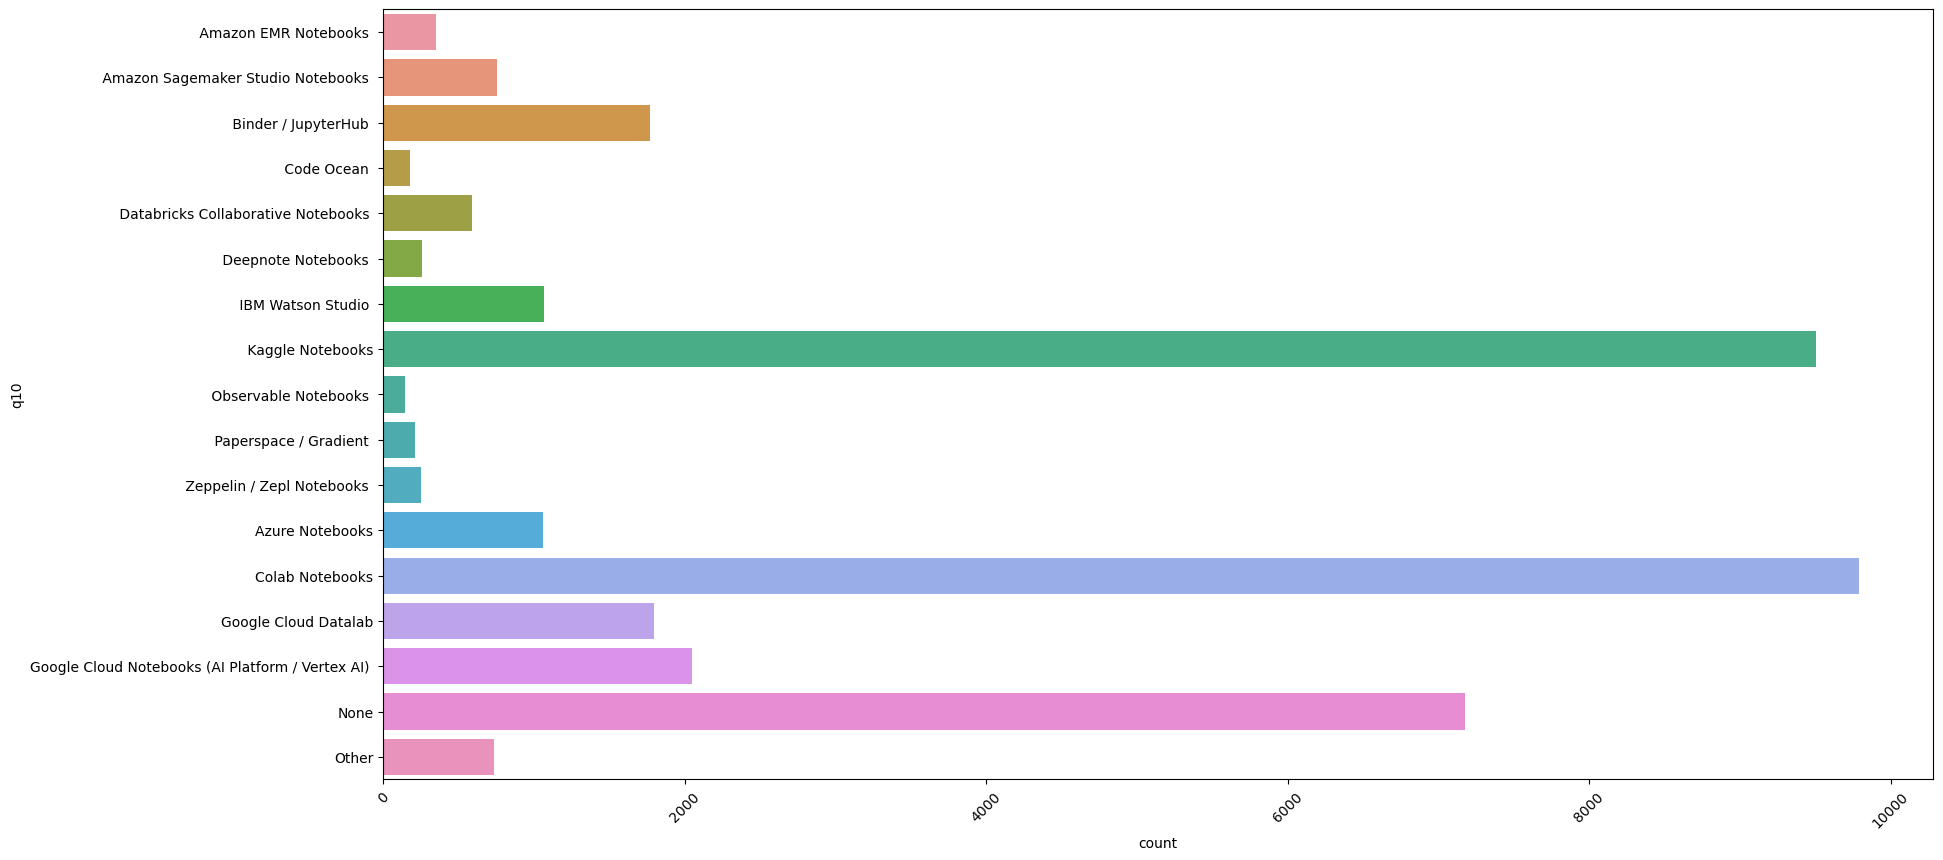

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.xticks(rotation = 45);